<a href="https://colab.research.google.com/github/nilradi/DS-Projects/blob/main/P4_Prediciendo_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0b6cb57d8936648c28daae5772a9551473981f9bbe12ceb07d68693b6d51e41a
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
news_data = pd.read_csv('/content/drive/MyDrive/proyectos/P4/Data/news.csv')
news_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [6]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
news_data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [11]:
labels = news_data.label
labels.head(10)


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [12]:
#Primero, separamos los datos en entrenamiento y en test

x_train, x_test, y_train, y_test = train_test_split(news_data['text'], labels, test_size = 0.4, random_state =7)

In [13]:
#Inicializamos TfidVectorizer con stop words de inglés

vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

In [15]:
#Crear un clasificador 'PassiveAgressive'

passive = PassiveAggressiveClassifier(max_iter = 50)
passive.fit(tfidf_train, y_train)

y_pred = passive.predict(tfidf_test)

In [16]:
# Crear una matrix de confusión

matrix = confusion_matrix(y_test, y_pred, labels =["FAKE","REAL"])
matrix

array([[1186,   84],
       [  88, 1176]])

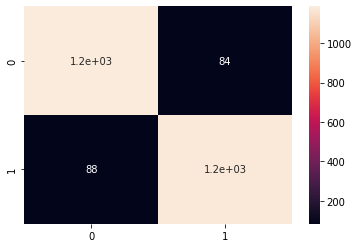

In [17]:
# Visualiza el chart

sns.heatmap(matrix, annot = True)
plt.show()

In [18]:
#Calculamos la accuracy

Accuracy = accuracy_score(y_test, y_pred)
Accuracy*100

93.21231254932913

## La precision del modelo es un 93%

In [19]:
Report = classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

